<a href="https://colab.research.google.com/github/kobak777/TAOI_lab1/blob/main/TAOI_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install apyori
import time
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori as apr
from tabulate import tabulate

# Ввод названия файла
file_name = input('Введите название файла с набором данных: ')

# Выгрузка данных из файла
with open(file_name, encoding='cp1251') as f:
    dataset = f.read().split('\n')

baskets = [s.split(',') for s in dataset]



Введите название файла с набором данных: /content/baskets.csv


In [63]:
# Функция для отображения ассоциативных правил
def display_association_rules(association_rules, min_confidence_value):
    print(f"\nМинимальное значение достоверности {min_confidence_value}%: {len(association_rules)} ассоциативных правил")

    table_data = []
    for rule in association_rules[:20]:  # Ограничиваем вывод 20 правилами
        for ordered_stat in rule.ordered_statistics:
            antecedent = ', '.join(ordered_stat.items_base) if ordered_stat.items_base else "—"
            consequent = ', '.join(ordered_stat.items_add) if ordered_stat.items_add else "—"
            table_data.append([antecedent, consequent, rule.support, ordered_stat.confidence])

    print(tabulate(table_data, headers=["Антецедент", "Консеквент", "Поддержка", "Достоверность"], tablefmt="fancy_grid"))

In [64]:
# Функция для фильтрации правил по количеству объектов
def filter_rules_by_length(rules, max_length=7):
    return [rule for rule in rules if any(len(ordered_stat.items_base) + len(ordered_stat.items_add) <= max_length for ordered_stat in rule.ordered_statistics)]

# Поиск частых наборов
support = 0.01  # Фиксированное значение поддержки
confidences = range(20, 70, 5)  # Порог достоверности от 20% до 65% с шагом 5%
execution_times = []
rule_counts = []
association_rules = []

for min_conf in confidences:
    start_time = time.time()
    rules = apr(baskets, min_support=support, min_confidence=min_conf / 100)
    filtered_rules = filter_rules_by_length(list(rules))
    execution_duration = time.time() - start_time

    execution_times.append(execution_duration)
    rule_counts.append(len(filtered_rules))
    association_rules.append((min_conf, filtered_rules))

    # Выводим таблицу
    display_association_rules(filtered_rules, min_conf)


Минимальное значение достоверности 20%: 126 ассоциативных правил
╒═════════════════╤══════════════════╤═════════════╤═════════════════╕
│ Антецедент      │ Консеквент       │   Поддержка │   Достоверность │
╞═════════════════╪══════════════════╪═════════════╪═════════════════╡
│ —               │ минеральная вода │   0.238336  │        0.238336 │
├─────────────────┼──────────────────┼─────────────┼─────────────────┤
│ авокадо         │ минеральная вода │   0.0115969 │        0.348    │
├─────────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики        │ картофель-фри    │   0.020128  │        0.211781 │
├─────────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики        │ макароны         │   0.0255932 │        0.269285 │
├─────────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики        │ минеральная вода │   0.0337243 │        0.354839 │
├─────────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики 

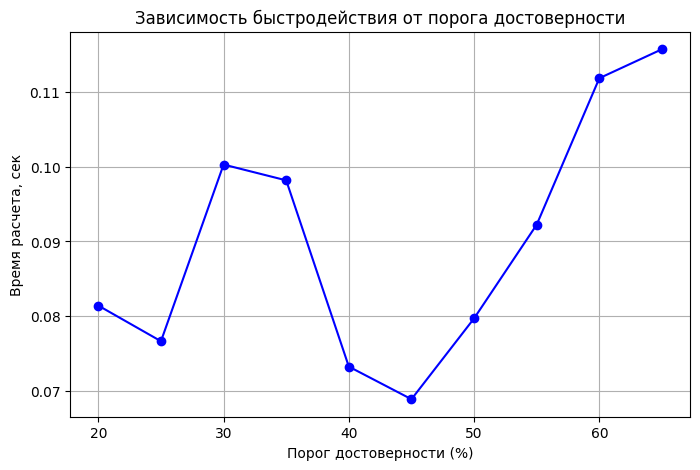

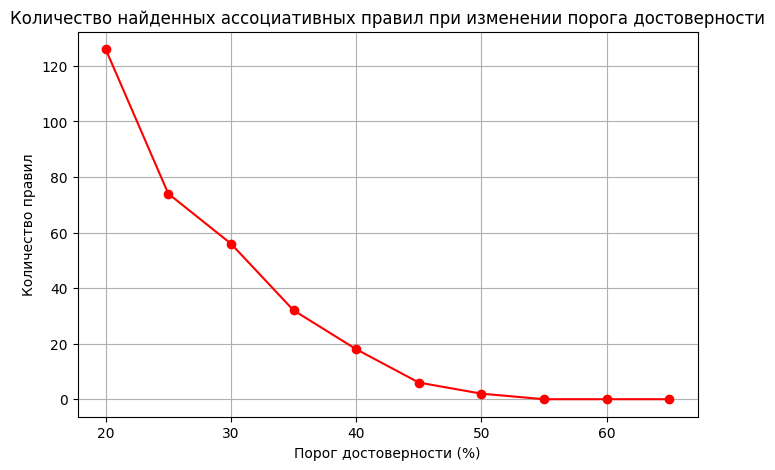

In [65]:
# Визуализация времени выполнения
plt.figure(figsize=(8, 5))
plt.plot(confidences, execution_times, marker='o', linestyle='-', color='b')
plt.title("Зависимость быстродействия от порога достоверности")
plt.xlabel("Порог достоверности (%)")
plt.ylabel("Время расчета, сек")
plt.grid(True)
plt.show()

# Визуализация количества найденных правил
plt.figure(figsize=(8, 5))
plt.plot(confidences, rule_counts, marker='o', linestyle='-', color='r')
plt.title("Количество найденных ассоциативных правил при изменении порога достоверности")
plt.xlabel("Порог достоверности (%)")
plt.ylabel("Количество правил")
plt.grid(True)
plt.show()

In [66]:
# Подготовка списка правил с суммарно не более 7 объектами
selected_rules = []
for conf, rules in association_rules:
    for rule in rules:
        for ordered_stat in rule.ordered_statistics:
            antecedent = ', '.join(ordered_stat.items_base) if ordered_stat.items_base else "—"
            consequent = ', '.join(ordered_stat.items_add) if ordered_stat.items_add else "—"
            if len(ordered_stat.items_base) + len(ordered_stat.items_add) <= 7:
                selected_rules.append([antecedent, consequent, rule.support, ordered_stat.confidence])

# Ограничение на количество выводимых правил (например, показываем первые 10)
max_display_count = 10
print(f"\nСписок отфильтрованных правил (до 7 объектов в совокупности), всего {len(selected_rules)} правил:")
print(tabulate(selected_rules[:max_display_count], headers=["Антецедент", "Консеквент", "Поддержка", "Достоверность"], tablefmt="fancy_grid"))

# Добавим сообщение, если правил больше, чем мы показываем
if len(selected_rules) > max_display_count:
    print(f"\nПоказано только первые {max_display_count} правил из {len(selected_rules)}.")



Список отфильтрованных правил (до 7 объектов в совокупности), всего 390 правил:
╒══════════════╤══════════════════╤═════════════╤═════════════════╕
│ Антецедент   │ Консеквент       │   Поддержка │   Достоверность │
╞══════════════╪══════════════════╪═════════════╪═════════════════╡
│ —            │ минеральная вода │   0.238336  │        0.238336 │
├──────────────┼──────────────────┼─────────────┼─────────────────┤
│ авокадо      │ минеральная вода │   0.0115969 │        0.348    │
├──────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики     │ картофель-фри    │   0.020128  │        0.211781 │
├──────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики     │ макароны         │   0.0255932 │        0.269285 │
├──────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики     │ минеральная вода │   0.0337243 │        0.354839 │
├──────────────┼──────────────────┼─────────────┼─────────────────┤
│ блинчики     │ шоколад          │